## In-class exercise for tutorial 010

In this exercise we will practice making datasets. We will on the one hand simulating data, on the other hand not quite as we will be making some asumptions and simplifaction on the data generation process that will not make the data.

Nestor lives right under the ATX airport, along the routes of airliners from major companies (United, Delt, etc).

Because of that Nestor hears noise. The noise is generated by the airplanes landing and taking off. There is a lot of noise that is generated by these airplanes. One day Nestor decides to simulate the noise generated by the airplanes and reaching his years. [Nestor is worried about his hearing loss](https://www.cdc.gov/niosh/topics/aircrew/noise.html). 

### The problem to simulate

Nestor is interested in calculating how much noise he is being exposed to. So he goes and looks up the timetable during the 3 hours window in the morning, when he is at home, and during the 7 hours window in the evening, when he is at hom, and before midnight when the airport shuts down and no more flights land or takeoff.

Nestor lives about 2 miles away from the airport. At that distance each jet generates about 75-80 dB (Decibels).
We will say 75dB. In the morning there are about 45 airplanes that land/takeoff. Each airplane can be heard consistently for about 7 minutes (we will assume a flat top distribution of the dBs, no ramp up, no decay, a simple flat distribution).

In the 3 hours window of the morning, Airplanes depart and land every 3 minutes, so their noise overlap for about 4 minutes. The dB of an airplane is corrupted by noise due to the city and nature around around, the cars, trains, trucks (all add some noise, randomly) and the position of the moving cloud in the sky, the wind and humidity (all diminish the noise randomly). So the noise is never 75dB but it stays on average around 75 dB while being corrupted by noise.

In the 7 hours window of the evening, Airplanes depart and land about every 4 minutes, so their noise overlaps for about 3 minutes. 

Nestor will assume a linear summation of the airplane noise in a single day. This is not the best way especially when dealing with dB, but this is a simple exercise and we can break some fundamental physics rules to make things easier for us. We will want to simulate the situation. 

How many airplanes depart/land in the morning widow of a single day. How many in the evening window? 

In [1]:
# give descriptive names to the values given above

noysLevel = 75        # in dB
noysVar = 2           # a complete guess about variability in the noise level
planeIntervalAM = 3   # how often the planes land
planeIntervalPM = 4
noysMinPerPlane = 7   # how long the noise from each plane lands

# length of morning and evening time blocks in minutes
mornMins = 3*60 # hr * min/hr = min
eveMins = 7*60

# total number of planes in the morning and evening
mornPlanes = mornMins/planeIntervalAM
evePlanes = eveMins/planeIntervalPM
print(mornPlanes, 'planes in the morning and ', evePlanes, ' planes in the evening.')

60.0 planes in the morning and  105.0  planes in the evening.


Literally every computer program I've ever written begins 
this same basic way:

- assign the stuff you already know (or need to guess) to variables
- (if necessary) compute other useful numbers based these numbers


Show the noise profile of one airplane in the morning (pure for the moment no corruption but other exsternal noise) 

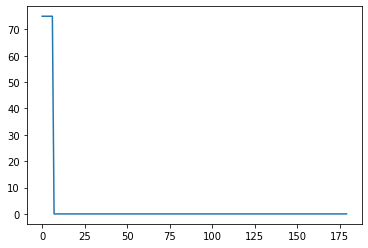

In [2]:
# Before doing this, let's import stuff we might need
import numpy as np
import matplotlib.pyplot as plt

'''
Okay, now, in order to show a noise profile, we need a place to hold the data.
We also know from what we just calculated that we will ultimately be doing this
for 60 (!) planes. 
So we can start by either:
- making a place for just one plane - a 1 plane by 180 min array - and go from there, or 
- make room for all the plane data - a 60 plane by 180 min array - right now.

I'm going to start with a single plane and build up, because that's what the tutorial did.
''' 

plane1Noys = np.zeros([mornMins, 1])           # make a minutes x 1 numpy array
plane1Noys[0:noysMinPerPlane, :] = noysLevel   # make the first 7 minutes LOUD!
plt.plot(plane1Noys)                           # and plot

Show the noise profile of the same airplane corrupted by some small noise. 

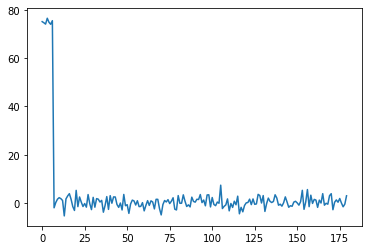

In [3]:
envNoys = noysVar*np.random.randn(mornMins, 1)   # make random "environmental noise"
plane1Noys = plane1Noys + envNoys                # add it to the "pure" plane noise                   
plt.plot(plane1Noys);

---

**Side note - totally skip this if you don't care!** 

Since we need an array of random numbers – the environmental noise – that is the *same shape* as `plane1Noys` so we can add them point-for-point, shouldn't we be able to just use `plane1Noys.shape` to tell `np.random.randn()` what to give us? We can! This was done in the tutorial, but it needs some unpacking. Let's look at what the `shape` method gives us:

In [4]:
arSize = plane1Noys.shape
print('arSize is ', arSize, 'and is a ', type(arSize))

arSize is  (180, 1) and is a  <class 'tuple'>


So `planeNoys.shape` gives us a "tuple" (which is a list you can't change). The trouble is that `np.random.rand()` expects a *separate argument* for each dimension, and will choke on a tuple. The solution is to use a super-secret Python trick to *unpack* the tuple using the asterisk, `*`. Like this:

In [5]:
print(arSize)
print(*arSize)

(180, 1)
180 1


See the difference? `arSize` is a tupple (with parentheses), but `*arSize` is unpacked into two separate numbers.

So `np.random.randn(*plane1Noys.shape)` would work just fine, while `np.random.randn(plane1Noys.shape)` would fail and keep giving you errors over and over even as you raised your head to the heavens and screamed **"This should be f--ing working!!!"** at the top of your lungs until your daughter came downstairs and told you "**Dad!** Just stop." 

Not that that happened to me or anything.

Okay, now back to the show!

---

Now add a second airplane, corrupted by noise but departing/landing at a different time. Make a plot of the two airplanes together.

Text(0, 0.5, 'noise (dB)')

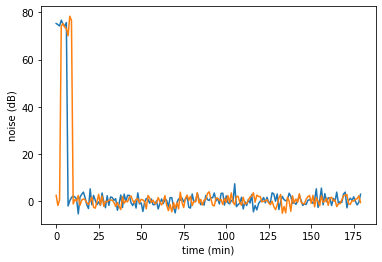

In [6]:
''' 
This is really 4 steps 
(though some or all of them could be combined into shorter but harder-to-read code): 
- figure out what time this plane's noise should start and stop
- make the second airplane noise profile
- add environmental noise to it
- combine it with the first plane's noise profile into a 180 minute by 2 plane array
'''
start = planeIntervalAM  # second plane noise should start 3 min in
stop = start + noysMinPerPlane # should stop 7 minutes later

plane2Noys = np.zeros([mornMins, 1])   # make numpy array
plane2Noys[start:stop, :] = noysLevel  # make some noise! hopefully at the right place

envNoys = noysVar*np.random.randn(mornMins, 1) # make the randomness of life
plane2Noys = plane2Noys + envNoys # add enviro noise 

planeNoys = np.hstack((plane1Noys,  plane2Noys)) # make a new array by joining our planes together (aw)

plt.plot(planeNoys); # and plot (use the terminal semicolon so you get ONLY the plot)
plt.xlabel('time (min)')
plt.ylabel('noise (dB)')

Finally, simulate all the the airplanes that you have estimated to land/depart in the morning. Plot them on the same figure.

In [7]:
'''
Okay. If we are going to figure out how to make 58 more planes, we have to ask ourselves
"When we went from making plane 1 to plane 2, what EXACTLY did we need to change?"
If we can figure out an easy way to change that (and only that), the making the rest of the 
planes should be straightforward. Boring AF, but straight forward.

So what changed? The only thing that changed was THE STARTING TIME OF THE PLANE NOISE.
That's it. That's all we need to change.

(You might say "Wait, the stopping time changed too!" True, but the stopping time is always
7 minutes after the start time, so as long as we bake that in, we shouldn't have to worry
about it.)

Let's compare the start and stop times for our first two planes from above
these are just the indexes at which we added "75"

    plane 1: 0,               noysMinPerPlane
    plane 2: planeIntervalAM, planeIntervalAM + noysMinPerPlane

plane 3 would just be another 3 minutes in, so adding it would look like:

    plane 1: 0,                                 noysMinPerPlane
    plane 2: planeIntervalAM,                   planeIntervalAM + noysMinPerPlane
    plane 3: planeIntervalAM + planeIntervalAM, planeIntervalAM + planeIntervalAM + noysMinPerPlane

or 

    plane 1: 0,                 noysMinPerPlane
    plane 2: planeIntervalAM,   planeIntervalAM + noysMinPerPlane
    plane 3: 2*planeIntervalAM, 2*planeIntervalAM + noysMinPerPlane

So in terms of the start times of the noise, all the planes would be:

    start = 0, planeIntervalAM, 2*planeIntervalAM, 3*planeIntervalAM, 4*planeIntervalAM...
    stop = start + noysMinPerPlane (for every plane)

In fact, let's say we assigned each plane a "planeID", such that 
plane 1 was planeID = 0, plane 2 was planeID = 1, etc. 

Then our starting times FOR EVERY PLANE would be:

    start = planeID*planeIntervalAM

And the stop times would, again, be just:

    stop = start + noysMinPerPlane

I told you the stop never had to change! The numerical value of "stop" will change, but not it's code. 
That's the power of variables!
'''

'\nOkay. If we are going to figure out how to make 58 more planes, we have to ask ourselves\n"When we went from making plane 1 to plane 2, what EXACTLY did we need to change?"\nIf we can figure out an easy way to change that (and only that), the making the rest of the \nplanes should be straightforward. Boring AF, but straight forward.\n\nSo what changed? The only thing that changed was THE STARTING TIME OF THE PLANE NOISE.\nThat\'s it. That\'s all we need to change.\n\n(You might say "Wait, the stopping time changed too!" True, but the stopping time is always\n7 minutes after the start time, so as long as we bake that in, we shouldn\'t have to worry\nabout it.)\n\nLet\'s compare the start and stop times for our first two planes from above\nthese are just the indexes at which we added "75"\n\n    plane 1: 0,               noysMinPerPlane\n    plane 2: planeIntervalAM, planeIntervalAM + noysMinPerPlane\n\nplane 3 would just be another 3 minutes in, so adding it would look like:\n\n    p

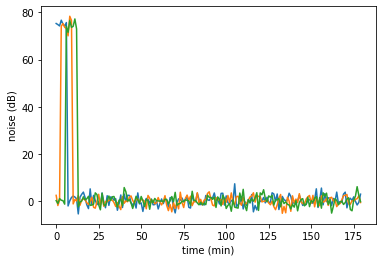

In [8]:
# Make the third plane

# figure out start and stop
planeIndex = 2  # the first plane was 0
start = planeIndex*planeIntervalAM  # noise should start 6 min in for 3rd plane
stop = start + noysMinPerPlane      # and always stops 7 minutes later

# make the noise profile
plane3Noys = np.zeros([mornMins, 1])            # make our array
plane3Noys[start:stop, :] = noysLevel           # add the plane noise
envNoys = noysVar*np.random.randn(mornMins, 1)  # random clouds, trees, unicorns, etc.
plane3Noys = plane3Noys + envNoys               # add the enviro noise

# append it to our "all planes" array
planeNoys = np.hstack((planeNoys,  plane3Noys)) # add new plane as column to big array

# and plot
plt.plot(planeNoys); # and plot (use the terminal semicolon so you get ONLY the plot)
plt.xlabel('time (min)');
plt.ylabel('noise (dB)');

Okay, awesome. So we sort of have a workflow. But now let us notice one other little thing... We keep storing each new planes noise profile in its own numpy array (plane2Noys, plane3Noys...) but then we just tack its values on to the big array, and then we don't need it anymore. In other words, all we need is a generic noise profile container; it doesn't have to be plane specific. If we do that, then **the only thing we'll need to change in our code to make new planes is `planeID`!** Let's see:

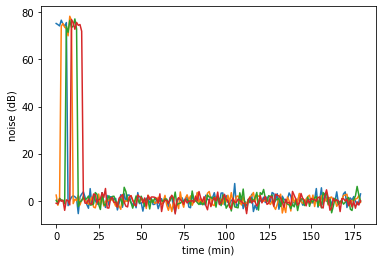

In [9]:
# Make the fourth plane using a genertic "nextPlaneNoys" array

# figure out start and stop
planeIndex = 3  # THIS IS THE ONLY THING WE SHOULD NEED TO CHANGE NOW
start = planeIndex*planeIntervalAM  # noise should start 6 min in for 3rd plane
stop = start + noysMinPerPlane      # and always stops 7 minutes later

# make the noise profile
nextPlaneNoys = np.zeros([mornMins, 1])         # make our array
nextPlaneNoys[start:stop, :] = noysLevel        # add the plane noise
envNoys = noysVar*np.random.randn(mornMins, 1)  # delicious randomness that makes life interesting
nextPlaneNoys = nextPlaneNoys + envNoys         # add life's randomness

# append it to our "all planes" array
planeNoys = np.hstack((planeNoys,  nextPlaneNoys)) # add new plane as column to big array

# and plot
plt.plot(planeNoys); # and plot (use the terminal semicolon so you get ONLY the plot)
plt.xlabel('time (min)');
plt.ylabel('noise (dB)');

Okay, that worked! So now we just need to copy and paste and just change planeID. Subsequent plane noises will all be stored in the same `nextPlaneNoys` array and then the values will be tacked onto our big planeNoys array.

Let's make just 10 planes - that will make the point.

In [10]:
################ Next plane please! ###################
# figure out start and stop
planeIndex = 4  # THIS IS THE ONLY THING CHANGING NOW!
start = planeIndex*planeIntervalAM  # noise should start 6 min in for 3rd plane
stop = start + noysMinPerPlane      # and always stops 7 minutes later

# make the noise profile
nextPlaneNoys = np.zeros([mornMins, 1])  # make our array for this first time only!
nextPlaneNoys[start:stop, :] = noysLevel # add the plane noise
envNoys = noysVar*np.random.randn(mornMins, 1)
nextPlaneNoys = nextPlaneNoys + envNoys # add the enviro noise

# append it to our "all planes" array
planeNoys = np.hstack((planeNoys,  nextPlaneNoys)) # add new plane as column to big array


################ Next plane please! ###################
# figure out start and stop
planeIndex = 5  # THIS IS THE ONLY THING CHANGING NOW!
start = planeIndex*planeIntervalAM  # noise should start 6 min in for 3rd plane
stop = start + noysMinPerPlane      # and always stops 7 minutes later

# make the noise profile
nextPlaneNoys = np.zeros([mornMins, 1])  # zero out the array
nextPlaneNoys[start:stop, :] = noysLevel # add the plane noise
envNoys = noysVar*np.random.randn(mornMins, 1)
nextPlaneNoys = nextPlaneNoys + envNoys # add the enviro noise

# append it to our "all planes" array
planeNoys = np.hstack((planeNoys,  nextPlaneNoys)) # add new plane as column to big array


################ Next plane please! ###################
# figure out start and stop
planeIndex = 6  # THIS IS THE ONLY THING CHANGING NOW!
start = planeIndex*planeIntervalAM  # noise should start 6 min in for 3rd plane
stop = start + noysMinPerPlane      # and always stops 7 minutes later

# make the noise profile
nextPlaneNoys = np.zeros([mornMins, 1])  # zero out the array
nextPlaneNoys[start:stop, :] = noysLevel # add the plane noise
envNoys = noysVar*np.random.randn(mornMins, 1)
nextPlaneNoys = nextPlaneNoys + envNoys # add the enviro noise

# append it to our "all planes" array
planeNoys = np.hstack((planeNoys,  nextPlaneNoys)) # add new plane as column to big array


################ Next plane please! ###################
# figure out start and stop
planeIndex = 7  # THIS IS THE ONLY THING CHANGING NOW!
start = planeIndex*planeIntervalAM  # noise should start 6 min in for 3rd plane
stop = start + noysMinPerPlane      # and always stops 7 minutes later

# make the noise profile
nextPlaneNoys = np.zeros([mornMins, 1])  # zero out the array
nextPlaneNoys[start:stop, :] = noysLevel # add the plane noise
envNoys = noysVar*np.random.randn(mornMins, 1)
nextPlaneNoys = nextPlaneNoys + envNoys # add the enviro noise

# append it to our "all planes" array
planeNoys = np.hstack((planeNoys,  nextPlaneNoys)) # add new plane as column to big array


################ Next plane please! ###################
# figure out start and stop
planeIndex = 8  # THIS IS THE ONLY THING CHANGING NOW!
start = planeIndex*planeIntervalAM  # noise should start 6 min in for 3rd plane
stop = start + noysMinPerPlane      # and always stops 7 minutes later

# make the noise profile
nextPlaneNoys = np.zeros([mornMins, 1])  # zero out the array
nextPlaneNoys[start:stop, :] = noysLevel # add the plane noise
envNoys = noysVar*np.random.randn(mornMins, 1)
nextPlaneNoys = nextPlaneNoys + envNoys # add the enviro noise

# append it to our "all planes" array
planeNoys = np.hstack((planeNoys,  nextPlaneNoys)) # add new plane as column to big array


################ Next plane please! ###################
# figure out start and stop
planeIndex = 9  # THIS IS THE ONLY THING CHANGING NOW!
start = planeIndex*planeIntervalAM  # noise should start 6 min in for 3rd plane
stop = start + noysMinPerPlane      # and always stops 7 minutes later

# make the noise profile
nextPlaneNoys = np.zeros([mornMins, 1])  # zero out the array
nextPlaneNoys[start:stop, :] = noysLevel # add the plane noise
envNoys = noysVar*np.random.randn(mornMins, 1)
nextPlaneNoys = nextPlaneNoys + envNoys # add the enviro noise

# append it to our "all planes" array
planeNoys = np.hstack((planeNoys,  nextPlaneNoys)) # add new plane as column to big array


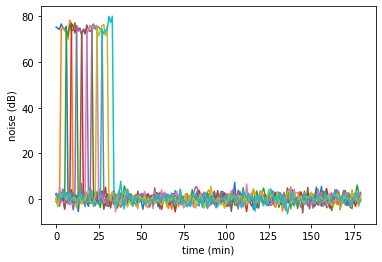

In [11]:
# and plot
plt.plot(planeNoys); # and plot (use the terminal semicolon so you get ONLY the plot)
plt.xlabel('time (min)');
plt.ylabel('noise (dB)');
# plt.xlim([0, 25])

Peek at the second and last plane – they should look like shifted copies of each other.

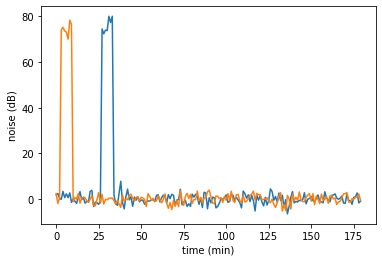

In [12]:
plt.plot(planeNoys[:,-1]);
plt.plot(planeNoys[:,1]);
plt.xlabel('time (min)');
plt.ylabel('noise (dB)');

And now – finally! – let's see what the total amount of noise poor Nestor has to deal with during the first half hour of his morning.

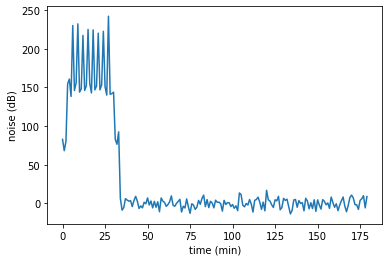

In [13]:
plt.plot(np.sum(planeNoys, 1)); # and plot (use the terminal semicolon so you get ONLY the plot)
plt.xlabel('time (min)');
plt.ylabel('noise (dB)');
# plt.xlim([0, 25])

Let's zoom in on the first 40 minutes of poor Nestor's morning.

(0.0, 40.0)

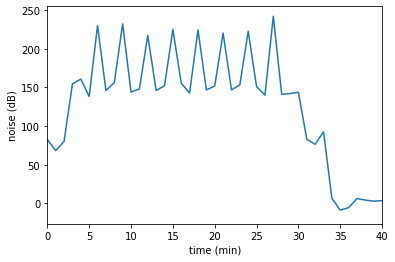

In [15]:
plt.plot(np.sum(planeNoys, 1)); # and plot (use the terminal semicolon so you get ONLY the plot)
plt.xlabel('time (min)');
plt.ylabel('noise (dB)');
plt.xlim([0, 40])

So here's our mission: See if you can write some similar code in which you can generate 10 planes of noise data in a single 180x10 numpy array, **where only one number needs to change across planes**. Then compute the total noise over time and make sure you get something like the above.

---
If you have that handled and have spare time or brain cycles, see if you if you can do this **using only one numpy array** – a 180 min by 10 plane array – and no additional arrays to hold individual plane noise or environmental noise.

---
Brain challange: we have used different "environmental" noise for each plane over the *same* 180 minutes? Is this reasonable? Or might there be environmental noise that should be common to all of the planes' noise profiles?